<h3>Machine Learning </h3>

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge,LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score

In [77]:
df = pd.read_csv("C:/Users/GAURAV/Desktop/ml/dataset1.csv")
dff=df
dff.head(10)

,DateTime,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
0,1/1/2019 0:00,6352,6527,1395,79,1383,1896,1744,300,30
1,1/1/2019 1:00,6116,5701,1393,96,1112,1429,1641,500,30
2,1/1/2019 2:00,5873,5676,1393,142,1030,1465,1616,200,30
3,1/1/2019 3:00,5682,5603,1397,191,972,1455,1558,250,30
4,1/1/2019 4:00,5557,5454,1393,159,960,1454,1458,30,30
5,1/1/2019 5:00,5525,5385,1395,91,958,1455,1456,10,30
6,1/1/2019 6:00,5513,5349,1392,98,938,1451,1440,20,31
7,1/1/2019 7:00,5524,5547,1392,93,1187,1446,1394,5,34
8,1/1/2019 8:00,5510,5471,1391,51,1325,1357,1303,8,34
9,1/1/2019 9:00,5617,5545,1388,15,1398,1328,1319,61,34


In [78]:
df.tail(10)

,DateTime,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
46001,3/31/2024 14:00,4083,3824,1393,126,564,569,418,689,63
46002,3/31/2024 15:00,4145,3715,1392,141,508,573,439,597,65
46003,3/31/2024 16:00,4859,5498,1395,528,1368,731,523,424,64
46004,3/31/2024 17:00,5172,5761,1395,556,1760,917,539,232,64
46005,3/31/2024 18:00,5424,6228,1395,555,2219,918,548,47,65
46006,3/31/2024 19:00,5618,5902,1398,505,2294,1012,620,6,65
46007,3/31/2024 20:00,6107,6205,1395,671,2389,1037,645,80,66
46008,3/31/2024 21:00,5991,5855,1395,868,2201,705,621,90,66
46009,3/31/2024 22:00,5527,5726,1393,908,2088,648,622,10,66
46010,3/31/2024 23:00,5111,5551,1391,1011,1845,633,607,100,66


In [79]:
df.isnull().sum()

DateTime         0
Consumption      0
Production       0
Nuclear          0
Wind             0
Hydroelectric    0
Oil and Gas      0
Coal             0
Solar            0
Biomass          0
dtype: int64

In [80]:
# Printing the "DateTime" column
print(df["DateTime"])

0          1/1/2019 0:00
1          1/1/2019 1:00
2          1/1/2019 2:00
3          1/1/2019 3:00
4          1/1/2019 4:00
              ...       
46006    3/31/2024 19:00
46007    3/31/2024 20:00
46008    3/31/2024 21:00
46009    3/31/2024 22:00
46010    3/31/2024 23:00
Name: DateTime, Length: 46011, dtype: object


In [81]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Extracting year and month from "DateTime"
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month

# Extracting unique values
unique_years = df['Year'].unique()
unique_months = df['Month'].unique()

# Print unique year and month
print(f"year {unique_years} month {unique_months}")


year [2019 2020 2021 2022 2023 2024] month [ 1  2  3  4  5  6  7  8  9 10 11 12]


In [82]:
df.shape

(46011, 12)

In [83]:
df.info

<bound method DataFrame.info of                  DateTime  Consumption  Production  Nuclear  Wind  \
0     2019-01-01 00:00:00         6352        6527     1395    79   
1     2019-01-01 01:00:00         6116        5701     1393    96   
2     2019-01-01 02:00:00         5873        5676     1393   142   
3     2019-01-01 03:00:00         5682        5603     1397   191   
4     2019-01-01 04:00:00         5557        5454     1393   159   
...                   ...          ...         ...      ...   ...   
46006 2024-03-31 19:00:00         5618        5902     1398   505   
46007 2024-03-31 20:00:00         6107        6205     1395   671   
46008 2024-03-31 21:00:00         5991        5855     1395   868   
46009 2024-03-31 22:00:00         5527        5726     1393   908   
46010 2024-03-31 23:00:00         5111        5551     1391  1011   

       Hydroelectric  Oil and Gas  Coal  Solar  Biomass  Year  Month  
0               1383         1896  1744    300       30  2019      1

In [84]:
df.isnull().sum()

DateTime         0
Consumption      0
Production       0
Nuclear          0
Wind             0
Hydroelectric    0
Oil and Gas      0
Coal             0
Solar            0
Biomass          0
Year             0
Month            0
dtype: int64

In [85]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Extract year and month from "DateTime"
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month

# Group by year and month, and sum the values for each column
grouped_df = df.groupby(['Year', 'Month']).agg({
    'Consumption': 'sum',
    'Production': 'sum',
    'Nuclear': 'sum',
    'Wind': 'sum',
    'Hydroelectric': 'sum',
    'Oil and Gas': 'sum',
    'Coal': 'sum',
    'Solar': 'sum',
    'Biomass': 'sum'
}).reset_index()

# Print the grouped DataFrame
# print(grouped_df)
# Calculate and print the correlation matrix
# Calculate the correlation matrix


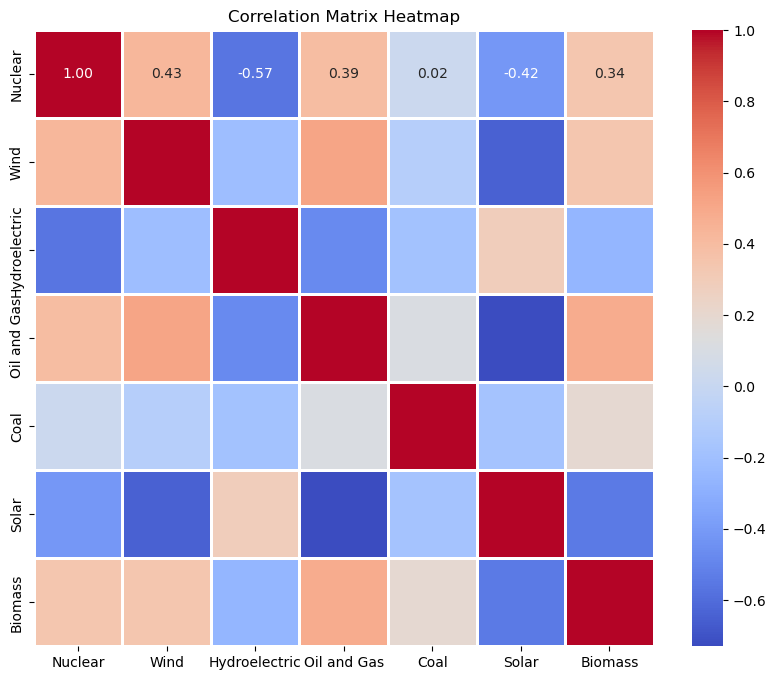

In [86]:
columns_to_drop = ['Year', 'Month', 'Production', 'Consumption']
correlation_matrix = grouped_df.drop(columns=columns_to_drop).corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

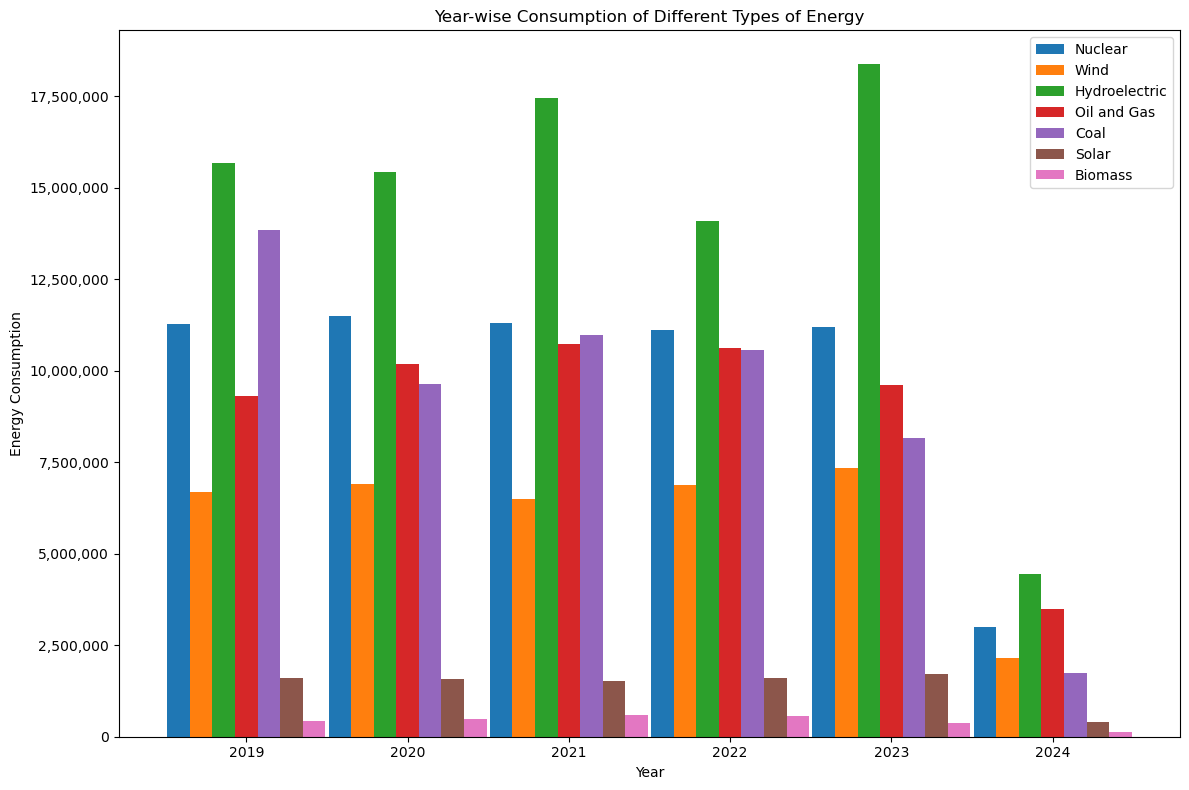

In [87]:
from matplotlib.ticker import FuncFormatter

# Sample data (replace this with your actual data)
energy_types = ['Nuclear', 'Wind', 'Hydroelectric', 'Oil and Gas', 'Coal', 'Solar', 'Biomass']
years = grouped_df['Year'].unique()

# Plotting
num_energy_types = len(energy_types)
bar_width = 0.14
index = np.arange(len(years))

plt.figure(figsize=(12, 8))

for i, energy_type in enumerate(energy_types):
    plt.bar(index + i * bar_width, grouped_df.groupby('Year')[energy_type].sum(), bar_width, label=energy_type)

plt.xlabel('Year')
plt.ylabel('Energy Consumption')
plt.title('Year-wise Consumption of Different Types of Energy')
plt.xticks(index + bar_width * (num_energy_types - 1) / 2, years)
plt.legend()

# Adjusting y-axis ticks format to disable scientific notation and display in full
formatter = FuncFormatter(lambda x, _: '{:,.0f}'.format(x))  # Define a formatter function
plt.gca().yaxis.set_major_formatter(formatter)  # Apply the formatter to the y-axis ticks

plt.tight_layout()
plt.show()

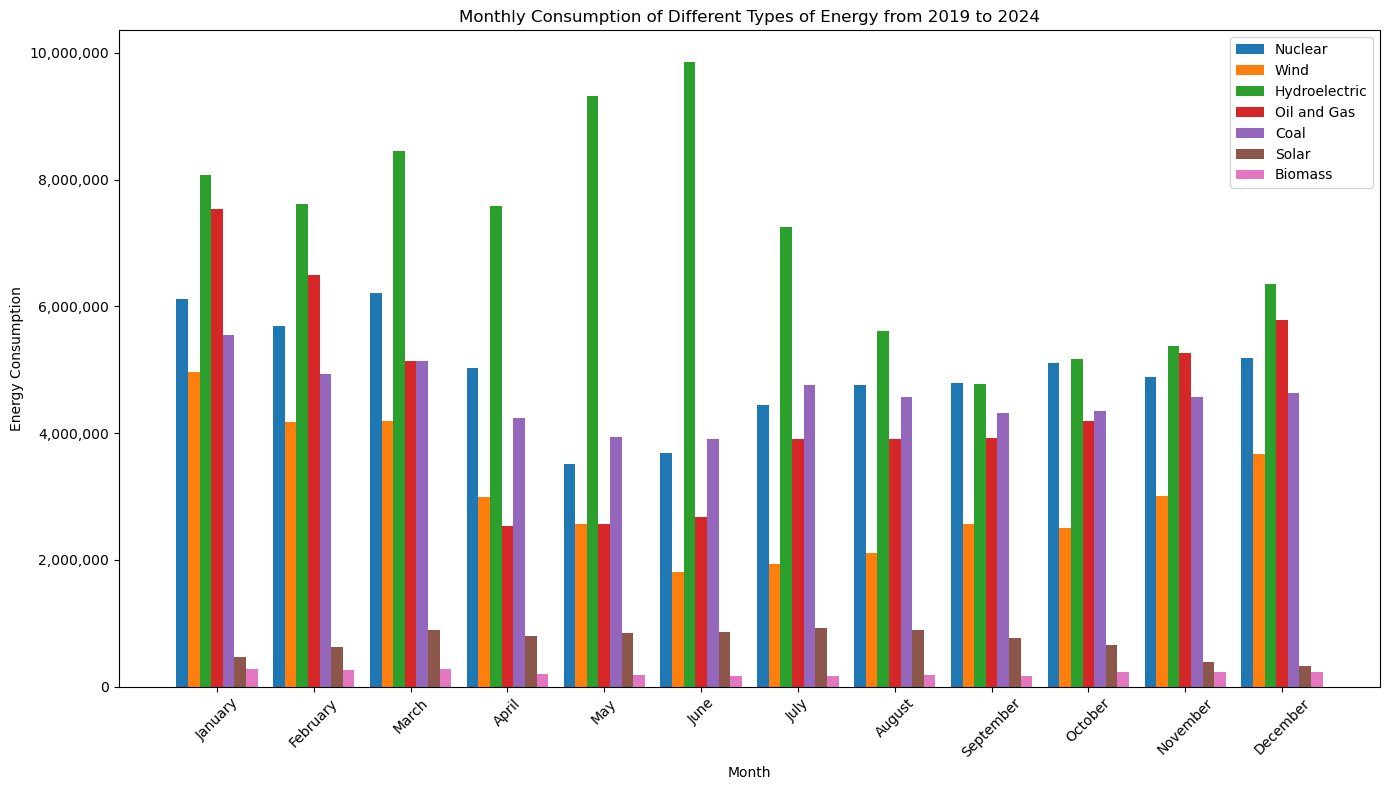

In [88]:
from matplotlib.ticker import FuncFormatter
energy_types = ['Nuclear', 'Wind', 'Hydroelectric', 'Oil and Gas', 'Coal', 'Solar', 'Biomass']

# Group by year and month
grouped_df = df.groupby([ 'Month']).agg({
    'Nuclear': 'sum',
    'Wind': 'sum',
    'Hydroelectric': 'sum',
    'Oil and Gas': 'sum',
    'Coal': 'sum',
    'Solar': 'sum',
    'Biomass': 'sum'
}).reset_index()

month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
grouped_df['MonthName'] = grouped_df['Month'].apply(lambda x: month_names[x - 1])

# Plotting
energy_types = ['Nuclear', 'Wind', 'Hydroelectric', 'Oil and Gas', 'Coal', 'Solar', 'Biomass']
num_energy_types = len(energy_types)
bar_width = 0.12
index = np.arange(len(grouped_df))

plt.figure(figsize=(14, 8))

for i, energy_type in enumerate(energy_types):
    plt.bar(index + i * bar_width, grouped_df[energy_type], bar_width, label=energy_type)

plt.xlabel('Month')
plt.ylabel('Energy Consumption')
plt.title('Monthly Consumption of Different Types of Energy from 2019 to 2024')
plt.xticks(index + bar_width * (num_energy_types - 1) / 2, grouped_df['MonthName'], rotation=45)
plt.legend()

# Adjusting y-axis ticks format to disable scientific notation and display in full
formatter = FuncFormatter(lambda x, _: '{:,.0f}'.format(x))  # Define a formatter function
plt.gca().yaxis.set_major_formatter(formatter)  # Apply the formatter to the y-axis ticks

plt.tight_layout()
plt.show()

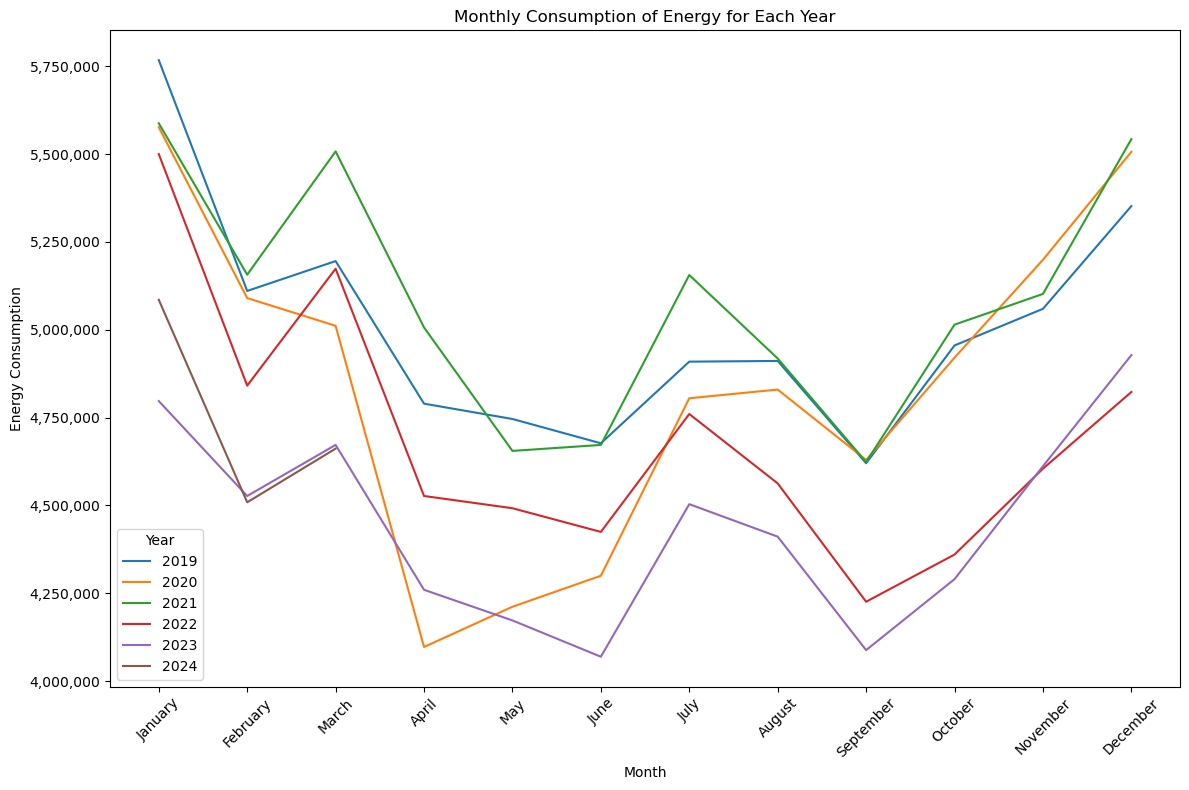

In [89]:
from matplotlib.ticker import FuncFormatter

# Sample data (replace this with your actual data)
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Extract year and month from 'DateTime'
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month

# Group by year and month and sum the values for each column
grouped_df = df.groupby(['Year', 'Month']).agg({
    'Consumption': 'sum'
}).reset_index()
energy_types = ['Consumption']
years = grouped_df['Year'].unique()

plt.figure(figsize=(12, 8))
for i, energy_type in enumerate(energy_types):
    for year in years:
        year_data = grouped_df[grouped_df['Year'] == year]
        plt.plot(year_data['Month'], year_data[energy_type], label=str(year))

plt.xlabel('Month')
plt.ylabel('Energy Consumption')
plt.title('Monthly Consumption of Energy for Each Year')
plt.xticks(range(1, 13), ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation=45)
plt.legend(title='Year')  # Add a title to the legend

# Adjusting y-axis ticks format for the line chart to disable scientific notation and display in full
formatter = FuncFormatter(lambda x, _: '{:,.0f}'.format(x))  # Define a formatter function
plt.gca().yaxis.set_major_formatter(formatter)  # Apply the formatter to the y-axis ticks

plt.tight_layout()
plt.show()

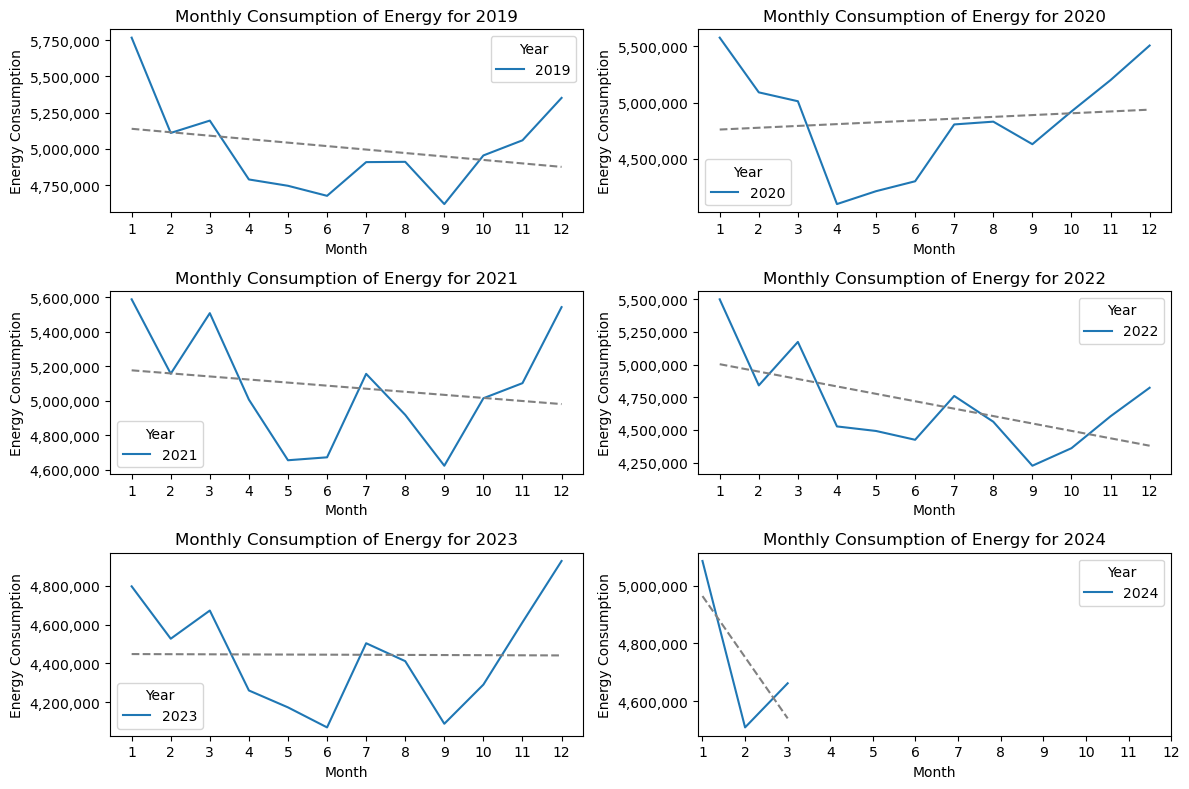

In [90]:
from matplotlib.ticker import FuncFormatter

# Sample data (replace this with your actual data)
energy_types = ['Consumption']
years = grouped_df['Year'].unique()

# Calculate the number of rows and columns needed
num_rows = (len(years) + 1) // 2
num_cols = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

for i, year in enumerate(years):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    year_data = grouped_df[grouped_df['Year'] == year]
    ax.plot(year_data['Month'], year_data[energy_types[0]], label=str(year))

    # Adding trend line for each year's monthly energy consumption
    trend = np.polyfit(range(len(year_data)), year_data[energy_types[0]], 1)
    ax.plot(year_data['Month'], np.polyval(trend, range(len(year_data))), linestyle='--', color='grey')

    ax.set_xlabel('Month')
    ax.set_ylabel('Energy Consumption')
    ax.set_title(f'Monthly Consumption of Energy for {year}')
    ax.set_xticks(range(1, 13))  # Assuming 12 months
    ax.legend(title='Year')  # Add a title to the legend

    # Adjusting y-axis ticks format for the line chart to disable scientific notation and display in full
    formatter = FuncFormatter(lambda x, _: '{:,.0f}'.format(x))  # Define a formatter function
    ax.yaxis.set_major_formatter(formatter)  # Apply the formatter to the y-axis ticks

plt.tight_layout()
plt.show()




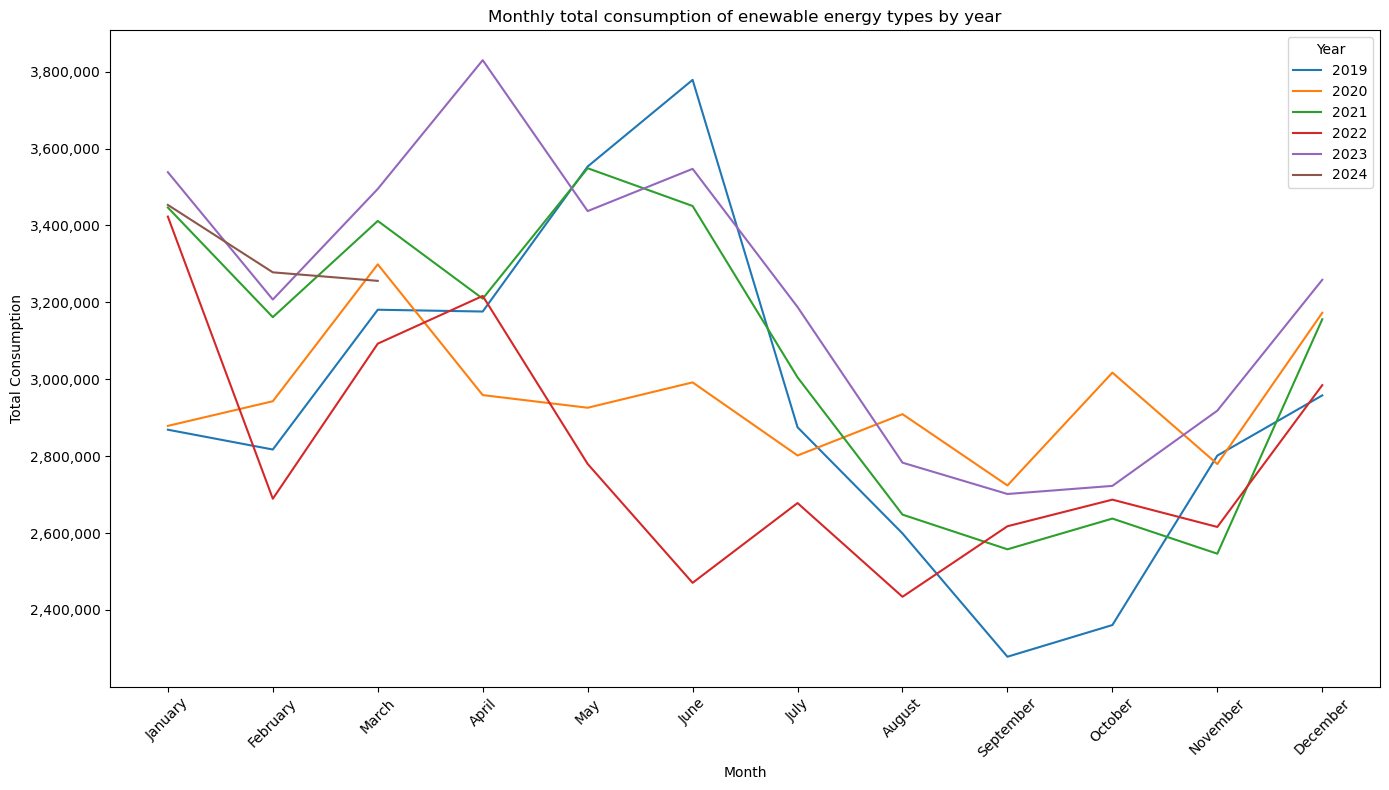

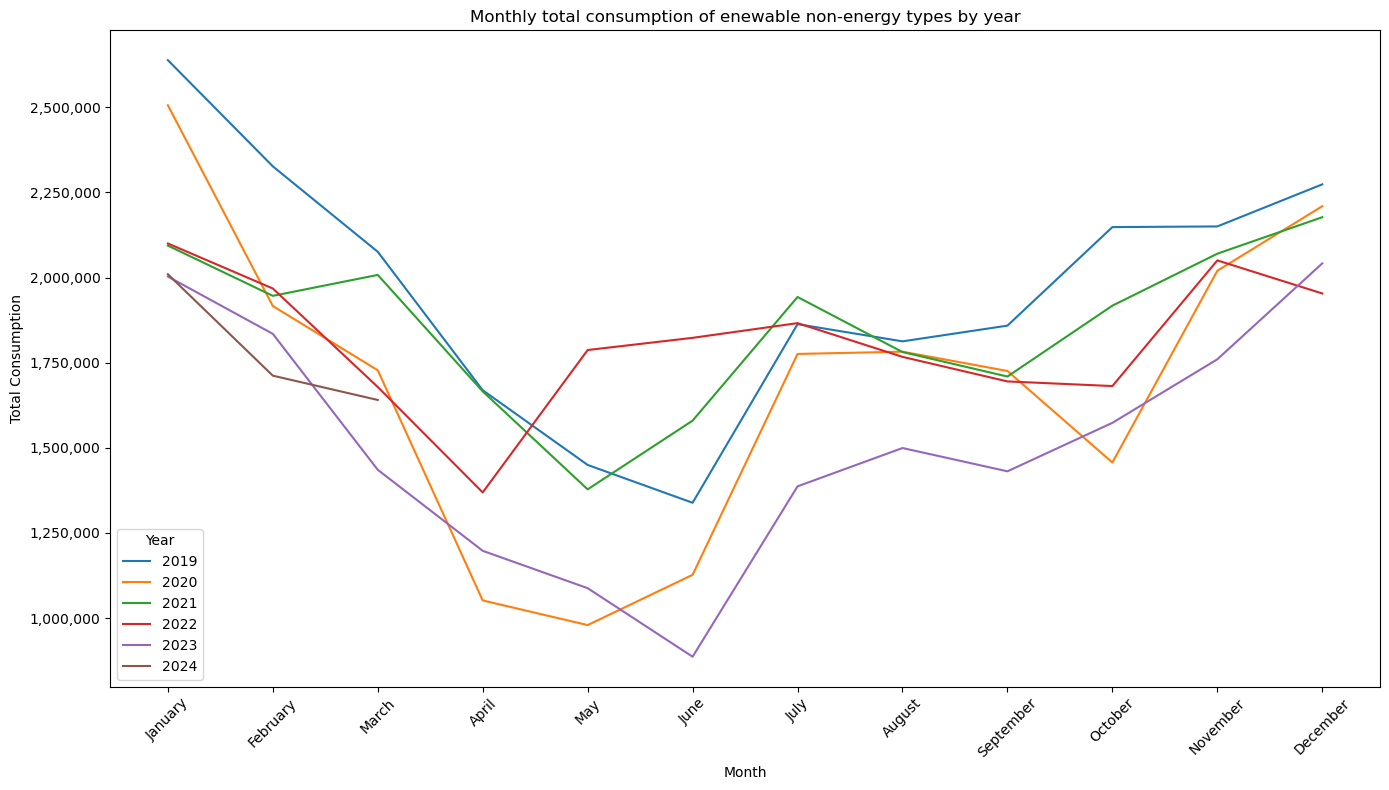

In [91]:
from matplotlib.ticker import FuncFormatter
from matplotlib.cm import get_cmap
# Extract year and month from 'DateTime'
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month

# Group by year and month and sum the values for each column
grouped_df = df.groupby(['Year', 'Month']).agg({
    'Consumption': 'sum',
    'Production': 'sum',
    'Nuclear': 'sum',
    'Wind': 'sum',
    'Hydroelectric': 'sum',
    'Oil and Gas': 'sum',
    'Coal': 'sum',
    'Solar': 'sum',
    'Biomass': 'sum'
}).reset_index()
# Plotting good energy types in one figure with legend
good_energy_types = ['Nuclear', 'Wind', 'Hydroelectric', 'Solar']
bad_energy_types = ['Biomass', 'Oil and Gas', 'Coal']

# Plotting total consumption for good energy types by year
plt.figure(figsize=(14, 8))
for i, year in enumerate(grouped_df['Year'].unique()):
    year_data = grouped_df[grouped_df['Year'] == year]
    total_good_energy = year_data[good_energy_types].sum(axis=1)
    plt.plot(year_data['Month'], total_good_energy, label=str(year))

plt.xlabel('Month')
plt.ylabel('Total Consumption')
plt.title('Monthly total consumption of enewable energy types by year')
plt.xticks(range(1, 13), ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
                          'August', 'September', 'October', 'November', 'December'], rotation=45)
plt.legend(title='Year')
plt.gca().get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))  # Format y-axis as integer

plt.tight_layout()
plt.show()

# Plotting total consumption for bad energy types by year
plt.figure(figsize=(14, 8))
for i, year in enumerate(grouped_df['Year'].unique()):
    year_data = grouped_df[grouped_df['Year'] == year]
    total_bad_energy = year_data[bad_energy_types].sum(axis=1)
    plt.plot(year_data['Month'], total_bad_energy, label=str(year))

plt.xlabel('Month')
plt.ylabel('Total Consumption')
plt.title('Monthly total consumption of enewable non-energy types by year')
plt.xticks(range(1, 13), ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
                          'August', 'September', 'October', 'November', 'December'], rotation=45)
plt.legend(title='Year')
plt.gca().get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))  # Format y-axis as integer

plt.tight_layout()
plt.show()

In [92]:
# Converting DateTime column to datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Set DateTime as the index
df.set_index('DateTime', inplace=True)

# Resampling the data to hourly frequency
df_resampled = df.resample('H').mean()

In [93]:
df_resampled

,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass,Year,Month
DateTime,,,,,,,,,,,
2019-01-01 00:00:00,6352.0,6527.0,1395.0,79.0,1383.0,1896.0,1744.0,300.0,30.0,2019.0,1.0
2019-01-01 01:00:00,6116.0,5701.0,1393.0,96.0,1112.0,1429.0,1641.0,500.0,30.0,2019.0,1.0
2019-01-01 02:00:00,5873.0,5676.0,1393.0,142.0,1030.0,1465.0,1616.0,200.0,30.0,2019.0,1.0
2019-01-01 03:00:00,5682.0,5603.0,1397.0,191.0,972.0,1455.0,1558.0,250.0,30.0,2019.0,1.0
2019-01-01 04:00:00,5557.0,5454.0,1393.0,159.0,960.0,1454.0,1458.0,30.0,30.0,2019.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2024-03-31 19:00:00,5618.0,5902.0,1398.0,505.0,2294.0,1012.0,620.0,6.0,65.0,2024.0,3.0
2024-03-31 20:00:00,6107.0,6205.0,1395.0,671.0,2389.0,1037.0,645.0,80.0,66.0,2024.0,3.0
2024-03-31 21:00:00,5991.0,5855.0,1395.0,868.0,2201.0,705.0,621.0,90.0,66.0,2024.0,3.0


In [94]:
X = df[['Nuclear', 'Wind', 'Hydroelectric', 'Oil and Gas', 'Coal', 'Solar', 'Biomass']]
y = df['Consumption']

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
# Defining the models
models = {    
    'Random Forest': RandomForestRegressor(random_state=42),
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(random_state=42)
}

In [97]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R2': r2}

In [98]:
# Printing the results
print("Model Performance:")
for name, metrics in results.items():
    print(f"{name}:")
    print(f"  MSE: {metrics['MSE']:.2f}")
    print(f"  R2: {metrics['R2']:.2f}")

Model Performance:
Random Forest:
  MSE: 148713.15
  R2: 0.87
Linear Regression:
  MSE: 370283.66
  R2: 0.67
Ridge Regression:
  MSE: 370283.66
  R2: 0.67


<h3>Use PCA to reduce dimensions</h3>

In [103]:

from sklearn.decomposition import PCA

pca = PCA(0.90)
X_pca = pca.fit_transform(dff)
print(X_pca.shape)


(46011, 3)


In [100]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [101]:
results = {}
for name, model in models.items():
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R2': r2}

In [102]:
print("Model Performance:")
for name, metrics in results.items():
    print(f"{name}:")
    print(f"  MSE: {metrics['MSE']:.2f}")
    print(f"  R2: {metrics['R2']:.2f}")

Model Performance:
Random Forest:
  MSE: 27957.38
  R2: 0.71
Linear Regression:
  MSE: 30284.72
  R2: 0.74
Ridge Regression:
  MSE: 30284.72
  R2: 0.71
